<a href="https://colab.research.google.com/github/clopez95/CS461_Program_3/blob/main/NN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [539]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.utils import to_categorical, plot_model
from matplotlib import pyplot as plt
     

In [540]:
dataset = pd.read_csv("processed_cleveland.csv")

In [541]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


###ca and thal are object datatypes,
###I converted them into floats so that I can fill those NaN values with the median of those columns to avoid dropping rows since the dataset is already small enough.

In [542]:
dataset = dataset.replace({'?': np.nan})
dataset["ca"] = dataset.ca.astype(float)
dataset["thal"] = dataset.thal.astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [543]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [544]:
#fill the NaN values with the median, (not mean since that will give us a decimal number)
dataset = dataset.fillna(dataset.median())
dataset["ca"] = dataset.ca.astype(int)
dataset["thal"] = dataset.thal.astype(int)

#Splitting the dataset into the features and the target label
X = dataset.drop("num",axis=1)
y = dataset["num"]

#Normalize trestbps, chol, and thalach
sc = StandardScaler()
X[["trestbps", "chol", "thalach"]] = sc.fit_transform(X[["trestbps", "chol", "thalach"]])

#target label is changed to 1 if it is greater than 1
y[y >= 1] = 1


<ipython-input-544-0c4c1ad2f111>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y >= 1] = 1


In [545]:
#splitting the dataset into 80% training data, 10% test data, and 10% validation data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42, shuffle=True)

###Neural Network Model

In [546]:
model = keras.Sequential()

#input layer
model.add(keras.Input(shape=(13,)))

#hidden layer 1
model.add(layers.Dense(8, activation='elu')) 

#hidden layer 2
model.add(layers.Dense(8, activation='elu'))

#hidden layer 3
model.add(layers.Dense(8, activation='elu'))

#output later
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 8)                 112       
                                                                 
 dense_165 (Dense)           (None, 8)                 72        
                                                                 
 dense_166 (Dense)           (None, 8)                 72        
                                                                 
 dense_167 (Dense)           (None, 1)                 9         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [547]:
early_Stopping = EarlyStopping(monitor='val_acc', patience=6, min_delta = 0.01, verbose = 1)

In [548]:
fitted_model = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks = [early_Stopping])

Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 0.7705 - acc: 0.3182 - val_loss: 0.7837 - val_acc: 0.2000
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7554 - acc: 0.3719 - val_loss: 0.7722 - val_acc: 0.2333
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7485 - acc: 0.3636 - val_loss: 0.7473 - val_acc: 0.4000
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7417 - acc: 0.3967 - val_loss: 0.7148 - val_acc: 0.4000
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7270 - acc: 0.3760 - val_loss: 0.6806 - val_acc: 0.5333
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7104 - acc: 0.4504 - val_loss: 0.6510 - val_acc: 0.6333
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6926 - acc: 0.5537 - val_loss: 0.6229 - val_acc: 0.7333
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6707 - acc: 0.6033 - va

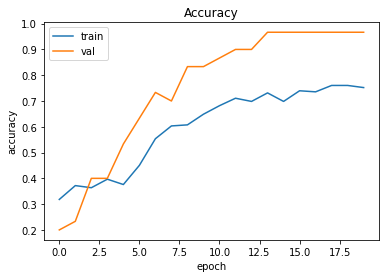

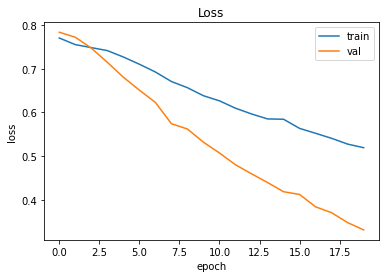

In [549]:
#plotting the trends to determine if it is overfitted.
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

#Plotting the normalized dataset in regards to loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
     
     

In [550]:
#model evaluated on validation training set. 
scores = model.evaluate(X_val, y_val)
print("\nModel on Validation Training Set:")
print("Model accuracy: ", scores[1])
print("Model loss: ", scores[0])

1/1 [==============================] - 0s 31ms/step - loss: 0.4919 - acc: 0.7742

Model on Validation Training Set:
Model accuracy:  0.774193525314331
Model loss:  0.4918857216835022


In [551]:
for num in range(0,len(y_val)):
  print("Validation Case Number %s:" % num)
  prediction = model.predict(X_val[num:num + 1])
  print("Actual Classification: ", y_val[num:num+1].to_string(index=False, header=False))
  print("Model Prediction: ", prediction[0][0])
  print()
  print("-----------------------------------------------")
  print()

Validation Case Number 0:
1/1 [==============================] - 0s 50ms/step
Actual Classification:  0
Model Prediction:  0.36435583

-----------------------------------------------

Validation Case Number 1:
1/1 [==============================] - 0s 13ms/step
Actual Classification:  1
Model Prediction:  0.8147713

-----------------------------------------------

Validation Case Number 2:
1/1 [==============================] - 0s 16ms/step
Actual Classification:  0
Model Prediction:  0.21560845

-----------------------------------------------

Validation Case Number 3:
1/1 [==============================] - 0s 15ms/step
Actual Classification:  1
Model Prediction:  0.41469938

-----------------------------------------------

Validation Case Number 4:
1/1 [==============================] - 0s 14ms/step
Actual Classification:  1
Model Prediction:  0.85481757

-----------------------------------------------

Validation Case Number 5:
1/1 [==============================] - 0s 13ms/step
Act